<a href="https://colab.research.google.com/github/yzbaya/FAD.Machine-Learning/blob/main/mod%C3%A8le_vente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_excel('data_model.xlsx')

In [3]:
# Séparer les features (X) de la target (y)
X = df.drop('Vente', axis=1)
y = df['Vente']

In [6]:
# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
}

In [8]:
# Tester chaque modèle
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'MSE': mse, 'MAE': mae, 'R2': r2}

In [9]:
# Afficher les résultats
for model_name, metrics in results.items():
    print(f"Modèle: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Modèle: Linear Regression
RMSE: 239.1740
MSE: 57204.2051
MAE: 54.6409
R2: 0.5438


Modèle: Decision Tree
RMSE: 81.1837
MSE: 6590.7878
MAE: 5.7812
R2: 0.9474


Modèle: Random Forest
RMSE: 71.8259
MSE: 5158.9651
MAE: 4.2034
R2: 0.9589


Modèle: Gradient Boosting
RMSE: 80.8091
MSE: 6530.1154
MAE: 11.0280
R2: 0.9479


Modèle: Support Vector Machine
RMSE: 354.3231
MSE: 125544.8278
MAE: 59.3912
R2: -0.0012


Modèle: K-Neighbors
RMSE: 124.9751
MSE: 15618.7683
MAE: 16.4514
R2: 0.8754


Modèle: XGBoost
RMSE: 298.0143
MSE: 88812.5509
MAE: 20.2832
R2: 0.2917


Modèle: AdaBoost
RMSE: 144.8475
MSE: 20980.7851
MAE: 93.3125
R2: 0.8327




In [11]:
best_model_name = None
best_model_metrics = None

# Critères pour le meilleur modèle : R^2 le plus proche de 1 et MSE le plus bas
for model_name, metrics in results.items():
    if best_model_metrics is None:
        best_model_name = model_name
        best_model_metrics = metrics
    else:
        # Comparer R^2 (le plus proche de 1) et MSE (le plus bas)
        if (abs(1 - metrics['R2']) < abs(1 - best_model_metrics['R2'])) or \
           (abs(1 - metrics['R2']) == abs(1 - best_model_metrics['R2']) and metrics['MSE'] < best_model_metrics['MSE']):
            best_model_name = model_name
            best_model_metrics = metrics

# Afficher les résultats du meilleur modèle
print(f"Le meilleur modèle est: {best_model_name}")
for metric_name, value in best_model_metrics.items():
    print(f"{metric_name}: {value:.4f}")

Le meilleur modèle est: Random Forest
RMSE: 71.8259
MSE: 5158.9651
MAE: 4.2034
R2: 0.9589


In [12]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

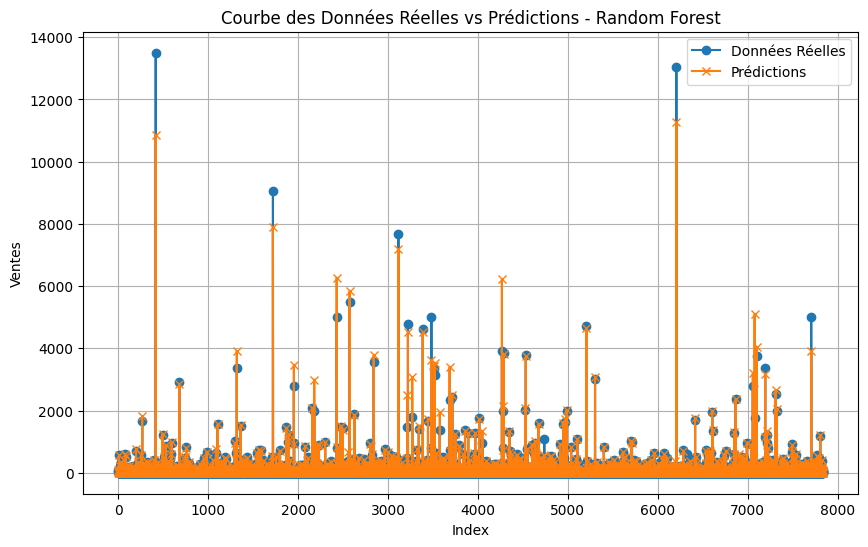

In [13]:
# Tracer la courbe des données réelles vs prédictions pour le meilleur modèle
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Données Réelles', marker='o')
plt.plot(y_pred_best, label='Prédictions', marker='x')
plt.xlabel('Index')
plt.ylabel('Ventes')
plt.title(f'Courbe des Données Réelles vs Prédictions - {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Sauvegarder le modèle en fichier .pkl
with open(f'{best_model_name}_predicter_vente.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [15]:
# Charger le modèle depuis le fichier .pkl
with open(f'{best_model_name}_predicter_vente.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [22]:
# Noms des colonnes
columns = ['Plage de Stock', 'S-CVTE', 'Coût unitaire', 'CMJ', 'Code catégorie article', 'Pareto', 'NJR', 'Achats']

# Nouvelle donnée
X_new1 = np.array([[9, 0, 7.128, 0.059829, 10, 12, 197, 0.358974]])
X_new2 = np.array([[9, 0, 16.739, 0.052632, 2, 12, 249, 0.526316]])
X_new3= np.array([[9, 0, 95.31, 0.169399, 10, 9, 286, 10.50273]])
X_new4=np.array([[9, 0, 109.177, 0.241176, 7, 4, 33, 15.19412]])
# Créer un DataFrame avec les mêmes colonnes que celles utilisées lors de l'entraînement
X_new1_df = pd.DataFrame(X_new1, columns=columns)
X_new2_df = pd.DataFrame(X_new2, columns=columns)
X_new3_df = pd.DataFrame(X_new3, columns=columns)
X_new4_df = pd.DataFrame(X_new4, columns=columns)

# Faire la prédiction
pred1 = loaded_model.predict(X_new1_df)
pred2 = loaded_model.predict(X_new2_df)
pred3 = loaded_model.predict(X_new3_df)
pred4 = loaded_model.predict(X_new4_df)
# Afficher le résultat
print('La vente prédite est : {}'.format(pred1[0]))
print('La vente prédite est : {}'.format(pred2[0]))
print('La vente prédite est : {}'.format(pred3[0]))
print('La vente prédite est : {}'.format(pred4[0]))

La vente prédite est : 6.0
La vente prédite est : 10.0
La vente prédite est : 61.41
La vente prédite est : 63.04
